In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_style('whitegrid')
print("✅ Library berhasil di-import!")

✅ Library berhasil di-import!


In [99]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
!ls

--2025-08-09 09:45:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘Online Retail.xlsx.3’

Online Retail.xlsx.     [           <=>      ]  22.62M  10.3MB/s    in 2.2s    

2025-08-09 09:45:23 (10.3 MB/s) - ‘Online Retail.xlsx.3’ saved [23715344]

'Online Retail.xlsx'	'Online Retail.xlsx.2'	 sample_data
'Online Retail.xlsx.1'	'Online Retail.xlsx.3'


In [100]:
df = pd.read_excel('Online Retail.xlsx')
print("✅ Dataset berhasil dimuat!")


✅ Dataset berhasil dimuat!


In [101]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [103]:
df.dropna(subset=['CustomerID'], inplace=True)

print("Jumlah data CustomerID yang hilang sekarang:", df['CustomerID'].isnull().sum())

Jumlah data CustomerID yang hilang sekarang: 0


In [104]:
df.drop_duplicates(inplace=True)

print("Ukuran data setelah menghapus duplikat:", df.shape)

Ukuran data setelah menghapus duplikat: (401604, 8)


In [105]:
# Menghapus transaksi retur
df = df[df['Quantity'] > 0]
# Menghapus data dimana UnitPrice adalah 0
df = df[df['UnitPrice'] > 0]

# Memeriksa kembali apakah masih ada nilai negatif atau 0
print("Jumlah Quantity <= 0 :", (df['Quantity'] <= 0).sum())
print("Jumlah UnitPrice <= 0:", (df['UnitPrice'] <= 0).sum())

Jumlah Quantity <= 0 : 0
Jumlah UnitPrice <= 0: 0


In [106]:
# Mengubah tipe data CustomerID menjadi integer (angka bulat)
df['CustomerID'] = df['CustomerID'].astype(int)

# Mengubah tipe data InvoiceDate menjadi datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Memeriksa kembali tipe data untuk memastikan sudah benar
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [107]:
# Membuat kolom baru 'TotalPrice' (Total Harga)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Menampilkan 5 baris pertama dengan kolom baru
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [108]:
# Menentukan tanggal 'snapshot' sebagai referensi (satu hari setelah transaksi terakhir)
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print("Tanggal referensi (snapshot date):", snapshot_date)

Tanggal referensi (snapshot date): 2011-12-10 12:50:00


In [109]:
# Menghitung nilai Recency, Frequency, dan Monetary untuk setiap pelanggan
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

# Mengganti nama kolom agar sesuai dengan RFM
rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalPrice': 'Monetary'}, inplace=True)

# Menampilkan 5 baris pertama dari tabel RFM
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


In [110]:
# Membuat skor Recency (semakin kecil Recency, semakin tinggi skornya)
r_labels = range(4, 0, -1)
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=r_labels)

# Membuat skor Frequency (semakin besar Frequency, semakin tinggi skornya)
f_labels = range(1, 5)
# .rank(method='first') digunakan untuk menangani nilai F yang sama
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=f_labels)

# Membuat skor Monetary (semakin besar Monetary, semakin tinggi skornya)
m_labels = range(1, 5)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=m_labels)

# Menampilkan 5 baris pertama dengan skor RFM
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score
CustomerID,,,,,,
12346,326,1,77183.60,1,1,4
12347,2,7,4310.00,4,4,4
12348,75,4,1797.24,2,3,4
12349,19,1,1757.55,3,1,4
12350,310,1,334.40,1,1,2


In [111]:
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str)

# Membuat nama segmen berdasarkan skor RFM
# Ini adalah cara yang lebih benar dan sesuai dengan skor 1-4 kita
def assign_segment(df):
    if df['RFM_Score'] == '44':
        return 'Champions'
    elif df['RFM_Score'] in ['43', '34', '33']:
        return 'Loyal Customers'
    elif df['RFM_Score'] in ['42', '32']:
        return 'Potential Loyalists'
    elif df['RFM_Score'] in ['41', '31']:
        return 'New Customers'
    elif df['RFM_Score'] in ['24', '23']:
        return 'At-Risk'
    elif df['RFM_Score'] in ['14', '13']:
        return 'Needs Attention'
    elif df['RFM_Score'] in ['22', '12', '21']:
        return 'About to Sleep'
    elif df['RFM_Score'] == '11':
        return 'Lost'
    else:
        return 'Uncategorized'

rfm['Segment'] = rfm.apply(assign_segment, axis=1)

# Menampilkan 5 baris terakhir
print("✅ Segmentasi berhasil diperbaiki!")
rfm.tail()

✅ Segmentasi berhasil diperbaiki!


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
CustomerID,,,,,,,,
18280,278,1,180.60,1,2,1,12,About to Sleep
18281,181,1,80.82,1,2,1,12,About to Sleep
18282,8,2,178.05,4,3,1,43,Loyal Customers
18283,4,16,2045.53,4,4,4,44,Champions
18287,43,3,1837.28,3,3,4,33,Loyal Customers


/tmp/ipython-input-2292510476.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='viridis')


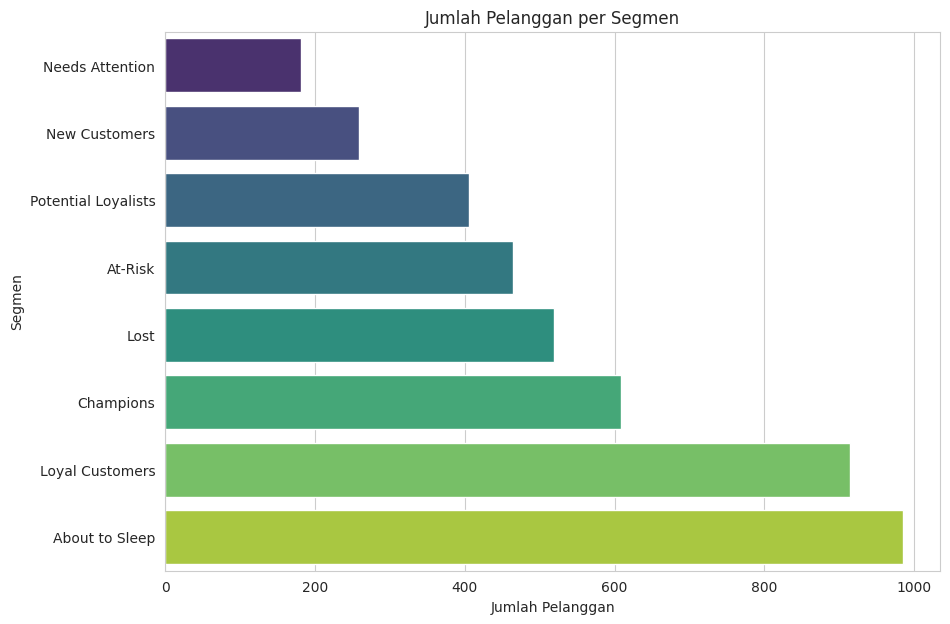

In [112]:
# Menghitung jumlah pelanggan di setiap segmen
segment_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

# Membuat plot batang untuk menampilkan jumlah pelanggan per segmen
plt.figure(figsize=(10, 7))
sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='viridis')
plt.title('Jumlah Pelanggan per Segmen')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Segmen')
plt.show()

In [113]:
# Menghitung rata-rata Recency, Frequency, dan Monetary untuk setiap segmen
segment_analysis = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().sort_values(by='Monetary', ascending=False)

# Menampilkan tabel hasil analisis
segment_analysis

,Recency,Frequency,Monetary
Segment,,,
Champions,7.646962,13.711002,7501.837159
Loyal Customers,24.473742,5.078775,2205.154563
At-Risk,84.784946,4.350538,1651.132991
Needs Attention,207.607735,3.712707,1494.129945
Potential Loyalists,24.076355,1.733990,1005.026601
About to Sleep,146.368528,1.383756,522.899840
Lost,262.870906,1.000000,482.088092
New Customers,27.092664,1.000000,353.527297


/tmp/ipython-input-2548491360.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], y=segment_analysis.index, x=segment_analysis['Recency'], palette='coolwarm')
/tmp/ipython-input-2548491360.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], y=segment_analysis.index, x=segment_analysis['Frequency'], palette='coolwarm')
/tmp/ipython-input-2548491360.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], y=segment_analysis.index, x=segment_analysis['Monetary'], palette='coolwarm')


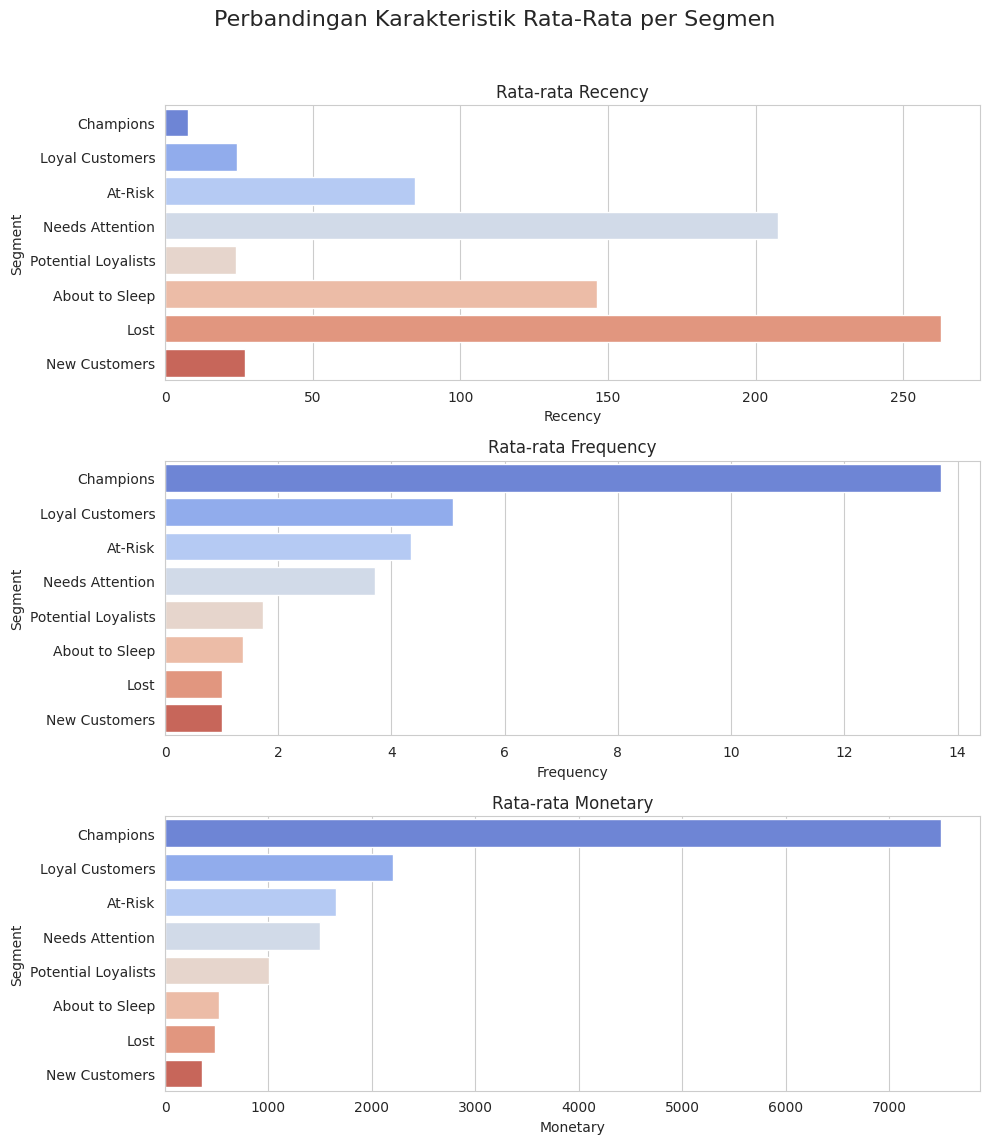

In [114]:
# Membuat visualisasi untuk perbandingan karakteristik segmen
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
fig.suptitle('Perbandingan Karakteristik Rata-Rata per Segmen', fontsize=16)

# Plot Recency
sns.barplot(ax=axes[0], y=segment_analysis.index, x=segment_analysis['Recency'], palette='coolwarm')
axes[0].set_title('Rata-rata Recency')

# Plot Frequency
sns.barplot(ax=axes[1], y=segment_analysis.index, x=segment_analysis['Frequency'], palette='coolwarm')
axes[1].set_title('Rata-rata Frequency')

# Plot Monetary
sns.barplot(ax=axes[2], y=segment_analysis.index, x=segment_analysis['Monetary'], palette='coolwarm')
axes[2].set_title('Rata-rata Monetary')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

In [118]:
print("--- REKOMENDASI BISNIS BERDASARKAN SEGMENTASI RFM ---")
print("="*55)
print("\nAnalisis ini mengelompokkan pelanggan ke dalam segmen-segmen berikut, dengan rekomendasi tindakan yang spesifik untuk setiap kelompok:\n")

# --- 1. SEGMENT: CHAMPIONS ---
# Menampilkan analisis untuk segmen 'Champions'
print("SEGMENT 1: Champions (Juara)")
print("-" * 30)

# Mengambil data statistik untuk segmen ini
champions_stats = rfm[rfm['Segment'] == 'Champions'].describe()
print(f"[Karakteristik]\nPelanggan terbaik Anda. Rata-rata baru membeli {champions_stats.loc['mean', 'Recency']:.1f} hari yang lalu, dengan frekuensi {champions_stats.loc['mean', 'Frequency']:.1f} kali transaksi, dan total belanja rata-rata Rp {champions_stats.loc['mean', 'Monetary']:,.2f}.")

print("\n[Rekomendasi Bisnis]")
print("-> Berikan penghargaan: Tawarkan program loyalitas eksklusif, akses awal ke produk baru, atau merchandise gratis.")
print("-> Tujuan: Jaga agar mereka tetap setia dan merasa dihargai (retention).")

# Kode untuk mendapatkan daftar pelanggan 'Champions'
champions_list = rfm[rfm['Segment'] == 'Champions']
print(f"\n[Tindakan Teknis]\n-> Ditemukan {len(champions_list)} pelanggan 'Champions'. Ekspor daftar ini untuk tim marketing.")
# champions_list.to_csv('daftar_pelanggan_champions.csv')

--- REKOMENDASI BISNIS BERDASARKAN SEGMENTASI RFM ---

Analisis ini mengelompokkan pelanggan ke dalam segmen-segmen berikut, dengan rekomendasi tindakan yang spesifik untuk setiap kelompok:

SEGMENT 1: Champions (Juara)
------------------------------
[Karakteristik]
Pelanggan terbaik Anda. Rata-rata baru membeli 7.6 hari yang lalu, dengan frekuensi 13.7 kali transaksi, dan total belanja rata-rata Rp 7,501.84.

[Rekomendasi Bisnis]
-> Berikan penghargaan: Tawarkan program loyalitas eksklusif, akses awal ke produk baru, atau merchandise gratis.
-> Tujuan: Jaga agar mereka tetap setia dan merasa dihargai (retention).

[Tindakan Teknis]
-> Ditemukan 609 pelanggan 'Champions'. Ekspor daftar ini untuk tim marketing.


In [117]:
# --- 2. SEGMENT: AT-RISK ---
print("\n\nSEGMENT 2: At-Risk (Berisiko)")
print("-" * 30)

# Mengambil data statistik untuk segmen ini
at_risk_stats = rfm[rfm['Segment'] == 'At-Risk'].describe()
print(f"[Karakteristik]\nPelanggan yang dulu berharga (frekuensi/belanja tinggi), tapi sudah lama tidak kembali (Recency tinggi, rata-rata {at_risk_stats.loc['mean', 'Recency']:.1f} hari).")

print("\n[Rekomendasi Bisnis]")
print("-> Reaktivasi: Kirim email personal dengan judul 'Kami Merindukanmu!' beserta kupon diskon khusus.")
print("-> Tujuan: Mendorong mereka untuk kembali berbelanja sebelum benar-benar pindah ke kompetitor.")

# Kode untuk mendapatkan daftar pelanggan 'At-Risk'
at_risk_list = rfm[rfm['Segment'] == 'At-Risk']
print(f"\n[Tindakan Teknis]\n-> Ditemukan {len(at_risk_list)} pelanggan 'At-Risk'. Prioritaskan daftar ini untuk kampanye reaktivasi.")
# at_risk_list.to_csv('daftar_pelanggan_at_risk.csv')



SEGMENT 2: At-Risk (Berisiko)
------------------------------
[Karakteristik]
Pelanggan yang dulu berharga (frekuensi/belanja tinggi), tapi sudah lama tidak kembali (Recency tinggi, rata-rata 84.8 hari).

[Rekomendasi Bisnis]
-> Reaktivasi: Kirim email personal dengan judul 'Kami Merindukanmu!' beserta kupon diskon khusus.
-> Tujuan: Mendorong mereka untuk kembali berbelanja sebelum benar-benar pindah ke kompetitor.

[Tindakan Teknis]
-> Ditemukan 465 pelanggan 'At-Risk'. Prioritaskan daftar ini untuk kampanye reaktivasi.
